In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [114]:
# a frame for playing around with the data. 
frame = pd.read_csv("STATS.csv")

already = set()
frame = frame.drop_duplicates(subset = ["WordCount","WordQuantity","WeToYouRatio"])
results = frame["Pageviews"]
print(len(frame))
#for n in frame["WordCount"]:
#    if n in already:e
#        print(n, "Duplicate")
#    else:
#        already.add(n)

1525


In [108]:
def binning(arr):
    bin_top = max(arr)
    bin_min = min(arr)
    bins = np.linspace(bin_min,bin_top,30)
    for j,x in enumerate(arr):
        for i,n in enumerate(bins):
            if x//n == 0:
                arr[j] = bins[i]
    print(arr)
    return(arr)

In [110]:
#print(binning(frame["Pageviews"]))
frame["binnedPage"] = binning(frame["Pageviews"])
print(frame["binnedPage"])

/home/drew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0       88075.0
1       88075.0
3       88075.0
5       88075.0
6       88075.0
8       88075.0
10      88075.0
14      88075.0
15      88075.0
17      88075.0
19      88075.0
20      88075.0
21      88075.0
22      88075.0
23      88075.0
24      88075.0
26      88075.0
28      88075.0
30      88075.0
31      88075.0
32      88075.0
33      88075.0
36      88075.0
38      88075.0
40      88075.0
41      88075.0
43      88075.0
45      88075.0
47      88075.0
49      88075.0
         ...   
1425    88075.0
1428    88075.0
1430    88075.0
1435    88075.0
1437    88075.0
1440    88075.0
1442    88075.0
1444    88075.0
1446    88075.0
1449    88075.0
1451    88075.0
1453    88075.0
1455    88075.0
1457    88075.0
1467    88075.0
1469    88075.0
1471    88075.0
1473    88075.0
1478    88075.0
1482    88075.0
1490    88075.0
1494    88075.0
1501    88075.0
1504    88075.0
1507    88075.0
1512    88075.0
1515    88075.0
1517    88075.0
1519    88075.0
1523    88075.0
Name: Pageviews, Length:

In [115]:
for n in frame.keys():
    print(n)
#print(frame["Pageviews"][:2000])

frame = frame.drop(['Pageviews','Gender','Speech'],axis = 1)
#print(frame['Pageviews'])



Abraham
Accountability
Adoption
Agency
AllScriptureCount
America
Angel
Art
Articles of Faith
Atonement
Attitude
Authority
AuthorityMentions
BYU
Balance
Baptism
Bible
Blessing
BoM
Body
Book of Mormon
Brigham Young
Brotherhood
Calling
Character
Charity
Chastity
Children
Christianity
Christmas
Church
Citizenship
Comforter
Commandments
Commitment
Communication
Compassion
Conscience
Consecration
Contention
Conversion
Courage
Covenant
Creation
Creativity
D&C
Date
Decision
Dedication
Disciple
Discipline
Discourage
Divine
Doctrine
Doctrine and Covenants
Education
Esteem
Eternal Life
Eternity
Exaltation
Example
Excellent
Failure
Faith
Family
Family History
Fear
Fellowship
Finance
FirstPersonPronoun
FleschReading
Foreordination
Forgiveness
Freedom
Friendship
Gender
Gift
Giving
God
Gospel
Government
Gratitude
Growth
Habit
Happiness
Heal
Heavenly Father
Heritage
History
Holy Ghost
Home
Honesty
Honor
Hope
Humility
I am a woman
Improvement
Individual Worth
Initiative
Inspiration
Integrity
Jesus Chri

In [130]:
print(len(results))
X_train, X_test = frame[:1400],frame[1100:]
Y_train, Y_test = results[:1400],results[1100:]
est = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,max_depth=5,random_state=0, loss='ls').fit(X_train,Y_train)
print(Y_test[100:150])
print(est.predict(X_test[100:150]))
mean_squared_error(Y_test, est.predict(X_test))

1525
1961     3008
1962       43
1964      586
1965       11
1969      196
1970     1161
1971     1520
1973      194
1974      987
1976     1978
1978      427
1979     1101
1980       21
1981    10090
1983      912
1985       15
1987     1426
1989       32
1991      363
1993      726
1995      966
1997       30
1999       23
2001      280
2002      465
2003        9
2005      859
2006      696
2007     2055
2009      870
2011      901
2013     1297
2015     5848
2017      227
2019     1093
2021        9
2023        6
2025      300
2026      262
2028     2273
2031       14
2033      688
2034     1052
2036      596
2037      121
2038      140
2040      184
2041       91
2044      170
2045       10
Name: Pageviews, dtype: int64
[ 2896.40175388   152.16161164   584.7207296    377.99428586   312.6306416
  1164.55762442  1385.74942304   265.22255167   862.0209596   1912.9094963
   408.15000432  1004.53185515    16.87094003  9719.64313009   871.25469203
   308.63215354  1223.82248211   146.68

18158215.495427102

In [68]:
filtered = pd.read_csv("Learning/features.csv")
feature = filtered["PopularByRate"]
print(filtered["PopularByRate"].value_counts())
print(filtered["PopularByAbsolute"].value_counts())
filtered = filtered.drop(["PopularByRate","PopularByAbsolute","Gender","Pageviews"],axis = 1)

n    1213
y     303
Name: PopularByRate, dtype: int64
n    1213
y     303
Name: PopularByAbsolute, dtype: int64


In [59]:
print(filtered.keys())



Index(['Polarity', 'Subjectivity', 'WordCount', 'FleschReading', 'OT', 'NT',
       'BoM', 'DC', 'PoGP', 'AllScriptureCount', 'StoryNames', 'TalkingSpeed',
       'AuthorityMentions', 'WeToYouRatio', 'WordQuantity',
       'FirstPersonPronoun', 'PercentInItalics', 'PercentInQuotes',
       'DaysElapsed', 'NameSearchResults', 'MonthGiven', 'YearGiven'],
      dtype='object')


0.89
0.87
0.85
0.85
0.85
0.85
0.84
0.84
0.83
0.83
0.82
0.77
0.76
0.74
0.75
0.73
0.75
0.75
0.75
0.75
0.75
0.72
0.73
0.74
0.75
0.75
0.75
0.76
0.75
0.75
0.71
0.73
0.73
0.73
0.73
0.74
0.76
0.75
0.76
0.75
0.7
0.73
0.73
0.74
0.75
0.75
0.75
0.75
0.75
0.75
0.7
0.73
0.73
0.74
0.74
0.74
0.73
0.74
0.74
0.74
0.7
0.73
0.73
0.73
0.73
0.74
0.74
0.73
0.73
0.73
0.7
0.73
0.73
0.73
0.73
0.74
0.73
0.72
0.74
0.75


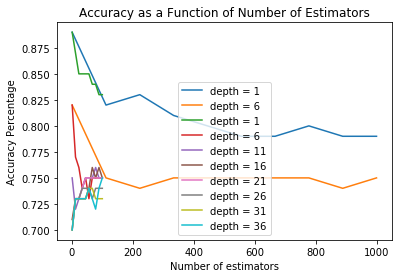

In [61]:
#Random Forest?
#np.random.randint(1,1400,size = 1400)
X = np.linspace(1,100,10)
result = []
xTrain, xTest = filtered[100:], filtered[:100]
yTrain, yTest = feature[100:], feature[:100]
for p in range(1,40,5):
    for n in X:
        clf = GradientBoostingClassifier(n_estimators=int(n),learning_rate=1,max_depth=p,random_state=0).fit(xTrain,yTrain)
        score = clf.score(xTest,yTest)
        print(score)
        result.append(score)
    plt.plot(X,result,label = "depth = {}".format(p))
    result = []
    plt.xlabel("Number of estimators")
    plt.ylabel("Accuracy Percentage")
    plt.title("Accuracy as a Function of Number of Estimators")
plt.legend()
plt.show()
    


0.815789473684
1
0.802631578947
0
0.796052631579
0
0.782894736842
0
0.756578947368
0
0.782894736842
1
0.776315789474
3
0.769736842105
2
0.776315789474
3
0.763157894737
3
0.815789473684
1
0.769736842105
7
0.703947368421
7
0.75
7
0.736842105263
6
0.717105263158
5
0.710526315789
5
0.703947368421
5
0.723684210526
6
0.703947368421
4
0.809210526316
1
0.684210526316
4
0.697368421053
6
0.703947368421
5
0.677631578947
4
0.684210526316
2
0.684210526316
3
0.664473684211
2
0.684210526316
5
0.684210526316
3
0.809210526316
1
0.703947368421
4
0.690789473684
4
0.710526315789
3
0.736842105263
5
0.723684210526
4
0.723684210526
4
0.723684210526
4
0.723684210526
4
0.723684210526
4
0.809210526316
1
0.730263157895
6
0.730263157895
3
0.743421052632
3
0.743421052632
3
0.743421052632
3
0.743421052632
3
0.743421052632
3
0.743421052632
3
0.743421052632
3
0.789473684211
1
0.697368421053
4
0.717105263158
2
0.717105263158
2
0.717105263158
2
0.717105263158
2
0.717105263158
2
0.717105263158
2
0.717105263158
2
0.71710

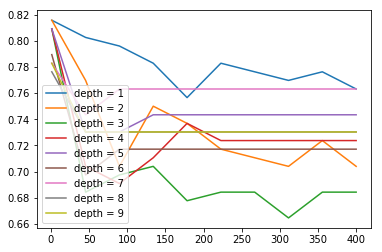

In [160]:
xTrain, xTest = train_test_split(filtered,test_size = .10)

#print(len(xTrain),len(xTest))
yTrain, yTest = train_test_split(feature,test_size = .10)
#print(len(yTrain),len(yTest))
#xTrain, xTest = filtered[100:], filtered[:100]
#yTrain, yTest = feature[100:], feature[:100]
X = np.linspace(1,400,10)
for p in range(1,10):
    result = []
    for n in range(1,400,40):
        clf = GradientBoostingClassifier(n_estimators=n,learning_rate=1,max_depth=p,random_state=0).fit(xTrain,yTrain)
        score = clf.score(xTest,yTest)
        result.append(score)
        print(score)
        print(confusion_matrix(clf.predict(xTest),yTest)[1,1])
    plt.plot(X,result,label = "depth = {}".format(p))
plt.legend()
plt.show()

In [292]:
a,b = 100, 500
xTrain, xTest = filtered[:a], filtered[a:]
yTrain, yTest = feature[:a], feature[a:]
clf = GradientBoostingClassifier(n_estimators=400,learning_rate=1,max_depth=6,random_state=0).fit(xTrain,yTrain)
print(clf.score(xTest,yTest))
print(confusion_matrix(clf.predict(xTest),yTest))
print(yTest)

xTrain, xTest = train_test_split(filtered,test_size = .18)
yTrain, yTest = train_test_split(feature,test_size = .18)
clf = GradientBoostingClassifier(n_estimators=400,learning_rate=1,max_depth=6,random_state=8).fit(xTrain,yTrain)
print(clf.score(xTest,yTest))
print(confusion_matrix(clf.predict(xTest),yTest))


0.867937853107
[[1053  112]
 [  75  176]]
100     y
101     y
102     n
103     n
104     n
105     n
106     n
107     n
108     n
109     n
110     y
111     y
112     n
113     y
114     y
115     n
116     y
117     y
118     n
119     n
120     n
121     y
122     y
123     y
124     n
125     y
126     y
127     n
128     n
129     n
       ..
1486    n
1487    n
1488    n
1489    n
1490    n
1491    n
1492    n
1493    n
1494    n
1495    n
1496    n
1497    n
1498    n
1499    n
1500    n
1501    n
1502    n
1503    n
1504    n
1505    n
1506    n
1507    n
1508    n
1509    n
1510    n
1511    n
1512    n
1513    n
1514    y
1515    n
Name: PopularByRate, Length: 1416, dtype: object
0.74358974359
[[198  44]
 [ 26   5]]
